# Lesson 25: Review of exercise 3

(c) 2018 Justin Bois. With the exception of pasted graphics, where the source is noted, this work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT).

This document was prepared at [Caltech](http://www.caltech.edu) with financial support from the [Donna and Benjamin M. Rosen Bioengineering Center](http://rosen.caltech.edu).

<img src="caltech_rosen.png">

*This lesson was generated from a Jupyter notebook.  You can download the notebook [here](l25_exercise_3.ipynb).*

<br /> <br />

In [1]:
import glob

import numpy as np
import pandas as pd

import altair as alt

import bootcamp_utils

## Exercise 3.0: Complete practice exercises

Complete the practice exercises from [lesson 21](../lessons/l21_practice_with_pandas.html) and [lesson 24](../lessons/l24_practice_with_pandas_and_altair.html).

<br />

## Exercise 3.1: Adding data to a DataFrame

In [Lesson 23](../lessons/l23_more_plotting_with_altair.html), we looked at a data set consisting of frog strikes. Recall that the header comments in the data file contained information about the frogs.

In [2]:
!head -20 data/frog_tongue_adhesion.csv

# These data are from the paper,
#   Kleinteich and Gorb, Sci. Rep., 4, 5225, 2014.
# It was featured in the New York Times.
#    http://www.nytimes.com/2014/08/25/science/a-frog-thats-a-living-breathing-pac-man.html
#
# The authors included the data in their supplemental information.
#
# Importantly, the ID refers to the identifites of the frogs they tested.
#   I:   adult, 63 mm snout-vent-length (SVL) and 63.1 g body weight,
#        Ceratophrys cranwelli crossed with Ceratophrys cornuta
#   II:  adult, 70 mm SVL and 72.7 g body weight,
#        Ceratophrys cranwelli crossed with Ceratophrys cornuta
#   III: juvenile, 28 mm SVL and 12.7 g body weight, Ceratophrys cranwelli
#   IV:  juvenile, 31 mm SVL and 12.7 g body weight, Ceratophrys cranwelli
date,ID,trial number,impact force (mN),impact time (ms),impact force / body weight,adhesive force (mN),time frog pulls on target (ms),adhesive force / body weight,adhesive impulse (N-s),total contact area (mm2),contact area without mucus (m

So, each frog has associated with it an age (adult or juvenile), snout-vent-length (SVL), body weight, and species (either cross or *cranwelli*). For a tidy `DataFrame`, we should have a column for each of these values. Your task is to load in the data, and then add these columns to the `DataFrame`. For convenience, here is a `DataFrame` with data about each frog.

In [3]:
df_frog = pd.DataFrame(data={'ID': ['I', 'II', 'III', 'IV'],
                             'age': ['adult', 'adult', 'juvenile', 'juvenile'],
                             'SVL (mm)': [63, 70, 28, 31],
                             'weight (g)': [63.1, 72.7, 12.7, 12.7],
                             'species': ['cross', 'cross', 'cranwelli', 'cranwelli']})

Note: This is a good exercise in searching through Pandas documentation and other online resources, such as StackOverflow. Remember, much of your programming efforts are spent searching through documentation and the internet.

There are lots of ways to solve this problem. This is a good exercise in searching through the [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/) and other online resources, such as [Stack Overflow](https://stackoverflow.com/questions). Remember, much of your programming efforts are spent searching through documentation and the internet.

After you have added this information to the data frame, make a scatter plot of adhesive force versus impact force and color the points by whether the frog is a juvenile or adult.

### Exercise 3.1 solution
The most direct way is to use [built-in `pd.merge()` function](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html). This function finds a common column between two `DataFrames`, and then uses that column to merge them, filling in values that match in the common column. This is exactly what we want.

In [4]:
# Load the data
df = pd.read_csv('data/frog_tongue_adhesion.csv', comment='#')

# Perform merge
df = df.merge(df_frog)

Let's look at the `DataFrame` to make sure it has what we expect.

In [5]:
df.head()

,date,ID,trial number,impact force (mN),impact time (ms),impact force / body weight,adhesive force (mN),time frog pulls on target (ms),adhesive force / body weight,adhesive impulse (N-s),total contact area (mm2),contact area without mucus (mm2),contact area with mucus / contact area without mucus,contact pressure (Pa),adhesive strength (Pa),age,SVL (mm),weight (g),species
0,2013_02_26,I,3,1205,46,1.95,-785,884,1.27,-0.290,387,70,0.82,3117,-2030,adult,63,63.1,cross
1,2013_02_26,I,4,2527,44,4.08,-983,248,1.59,-0.181,101,94,0.07,24923,-9695,adult,63,63.1,cross
2,2013_03_01,I,1,1745,34,2.82,-850,211,1.37,-0.157,83,79,0.05,21020,-10239,adult,63,63.1,cross
3,2013_03_01,I,2,1556,41,2.51,-455,1025,0.74,-0.170,330,158,0.52,4718,-1381,adult,63,63.1,cross
4,2013_03_01,I,3,493,36,0.80,-974,499,1.57,-0.423,245,216,0.12,2012,-3975,adult,63,63.1,cross


Looks good!

<br/>

## Exercise 3.2: Long-term trends in hybridization of Darwin finches

[Peter and Rosemary Grant](https://en.wikipedia.org/wiki/Peter_and_Rosemary_Grant) have been working on the Galápagos island of Daphne Major for over forty years.  During this time, they have collected lots and lots of data about physiological features of finches.  In 2014, they published a book with a summary of some of their major results (Grant P. R., Grant B. R., *40 years of evolution. Darwin's finches on Daphne Major Island*, Princeton University Press, 2014). They made their data from the book publicly available via the [Dryad Digital Repository](http://dx.doi.org/10.5061/dryad.g6g3h).

We will investigate their measurements of beak depth (the distance, top to bottom, of a closed beak) and beak length (base to tip on the top) of Darwin's finches.  We will look at data from two species, *Geospiza fortis* and *Geospiza scandens*.  The Grants provided data on the finches of Daphne for the years 1973, 1975, 1987, 1991, and 2012.  I have included the data in the files `grant_1973.csv`, `grant_1975.csv`, `grant_1987.csv`, `grant_1991.csv`, and  `grant_2012.csv`. They are in almost exactly the same format is in the Dryad repository; I have only deleted blank entries at the end of the files.

**Note**: If you want to skip the wrangling (which is very valuable experience), you can go directly to part (d). You can load in the `DataFrame` you generate in parts (a) through (c) from the file `~/git/bootcamp/data/grant_complete.csv`.

**a)** Load each of the files into separate Pandas `DataFrame`s.  You might want to inspect the file first to make sure you know what character the comments start with and if there is a header row.

**b)** We would like to merge these all into one `DataFrame`.  The problem is that they have different header names, and only the 1973 file has a year entry (called `yearband`).  This is common with real data.  It is often a bit messy and requires some wrangling.  

>1. First, change the name of the `yearband` column of the 1973 data to `year`.  Also, make sure the year format is four digits, not two!  
>2. Next, add a `year` column to the other four `DataFrame`s.  You want tidy data, so each row in the `DataFrame` should have an entry for the year.
>3. Change the column names so that all the `DataFrame`s have the same column names.  I would choose column names
>
>    `['band', 'species', 'beak length (mm)', 'beak depth (mm)', 'year']`
>
>4. Concatenate the `DataFrame`s into a single `DataFrame`. Be careful with indices! If you use `pd.concat()`, you will need to use the `ignore_index=True` kwarg. You might also need to use the `axis` kwarg.

**c)** The `band` field gives the number of the band on the bird's leg that was used to tag it.  Are some birds counted twice?  Are they counted twice in the same year?  Do you think you should drop duplicate birds from the same year?  How about different years?  My opinion is that you should drop duplicate birds from the same year and keep the others, but I would be open to discussion on that.  To practice your Pandas skills, though, let's delete only duplicate birds from the same year from the `DataFrame`.  When you have made this `DataFrame`, save it as a CSV file.

*Hint*: The `DataFrame` methods `duplicated()` and `drop_duplicates()` will be useful.

After doing this work, it is worth saving your tidy `DataFrame` in a CSV document. To this using the `to_csv()` method of your `DataFrame`. Since the indices are uninformative, you should use the `index=False` kwarg. (I have already done this and saved it as `~/git/bootcamp/data/grant_complete.csv`, which will help you do the rest of the exercise if you have problems with this part.)

**d)** It is informative to plot the measurement of each bird's beak as a point in the beak depth-beak length plane.  For the 1987 data, plot beak depth vs. beak width for *Geospiza fortis* and for *Geospiza scandens*.  Can you see the species demarcation?

**e)** Do part (d) again for all years. (*Hint*: Check out the `row` encoding, and/or read about faceting in the [Altair docs](https://altair-viz.github.io/user_guide/compound_charts.html?highlight=facet#faceted-charts)). Describe what you see.  Do you see the changes in the differences between species (presumably as a result of introgressive hybridization)?  In your plots, make sure all plots have the same range on the axes.

### Exercise 3.2: solution

Upon inspecting the files, we see that the comment character is, as usual, `#`.  There is also a header row in each file, as the first row, so they files are pretty standard.  It is important to note that not all of the column headings are the same, but the units of length in the measurements is millimeters.  Let's go ahead and load them in!  We will load them into a list. I will use the `glob` module to load in all the `csv` files with the substring `'grant'`.

In [6]:
# Get list of CSV files
csv_list = glob.glob('data/grant*19*.csv') + glob.glob('data/grant*20*.csv')

# Sort the list so we keep the years in order
csv_list.sort()

# Initialize list of DataFrames
df_list = []

# Load in each sequentially.
for csv_file in csv_list:
    # Read in DataFrame
    df = pd.read_csv(csv_file, comment='#')
    
    # Place in list
    df_list.append(df)

Let's take a quick look at the first entry in the list, just to make sure it loaded ok.

In [7]:
df_list[0].head()

,band,species,yearband,beak length,beak depth
0,20123,fortis,73,9.25,8.05
1,20126,fortis,73,11.35,10.45
2,20128,fortis,73,10.15,9.55
3,20129,fortis,73,9.95,8.75
4,20133,fortis,73,11.55,10.15


Looks good!

**b)** Before moving on, we need to know what year is associated with each `DataFrame`.  Fortunately, we sorted the list of CSV files, we have the years in order. We can extract the year from the file names.

In [8]:
# Initialize years
years = []
for csv_file in csv_list:
    years.append(int(csv_file[-8:-4]))

Let's check to make sure we got them, and sort them so we know the order.

In [9]:
years

[1973, 1975, 1987, 1991, 2012]

Looks good.  Now, we'll proceed with the steps we need to take to clean things up.  First, we'll change the `'yearband'` column in the `DataFrame` from 1973 to `'year'`, and change its year from `73` to `1973`.

In [10]:
# Rename to year
df_list[0] = df_list[0].rename(columns={'yearband': 'year'})

# No worries about Y2K
df_list[0]['year'] += 1900

# Check it out
df_list[0].head()

,band,species,year,beak length,beak depth
0,20123,fortis,1973,9.25,8.05
1,20126,fortis,1973,11.35,10.45
2,20128,fortis,1973,10.15,9.55
3,20129,fortis,1973,9.95,8.75
4,20133,fortis,1973,11.55,10.15


Great!  Let's proceed to add a `year` column to all of the other `DataFrame`s.  As we do it, we'll just reassign the 1973 year in that `DataFrame`, but that's no big deal.

In [11]:
for i, df in enumerate(df_list):
    df_list[i]['year'] = np.ones(len(df), dtype=int) * years[i]

Let's check one to make sure it makes sense.

In [12]:
df_list[3].head()

,band,species,blength,bdepth,year
0,2639,fortis,10.30,8.95,1991
1,2666,fortis,12.81,9.30,1991
2,2753,fortis,10.89,10.35,1991
3,2776,fortis,11.30,10.00,1991
4,4229,fortis,10.05,8.62,1991


Looks good.  Now, we need to change the column names so they are all the same for the respective `DataFrame`s.  We have few enough `DataFrame`s that we could do that by hand, but it is more instructive (and re-usable) if we automate it.  We will write a function to rename the columns.  It first sniffs out which column should be `'band'`, which should be `'species'`, and so on.  We can do this with Pandas's convenient `.str` methods, which enable us to use string methods on many entries at once.  This is perhaps best seen by example.

In [13]:
# Choose a DataFrame to try it on.
df = df_list[3]

# Look at the columns
df.columns

Index(['band', 'species', 'blength', 'bdepth', 'year'], dtype='object')

Now, if we are interested in the beak length column, we want to find a column heading that contains `'len'`, since pretty much anything that is about beak length would have the substring.  We can use the convenient `str.contains()` method.

In [14]:
# See which column had 'len' in it
df.columns.str.contains('len')

array([False, False,  True, False, False])

Now, we can slice out the column heading that has `'len'` in it.

In [15]:
df.columns[df.columns.str.contains('len')]

Index(['blength'], dtype='object')

Finally, we just want the string, so we do

In [16]:
df.columns[df.columns.str.contains('len')][0]

'blength'

We'll use this to identify the current column headings and then change them to what we want.

In [17]:
def rename_cols(df):
    """Rename columns so all DataFrames have same column headings."""
    
    # Sniff out the key names from names that are close
    band_key = df.columns[df.columns.str.contains('and')][0]
    species_key = df.columns[df.columns.str.contains('ecies')][0]
    length_key = df.columns[df.columns.str.contains('len')][0]
    depth_key = df.columns[df.columns.str.contains('dep')][0]
    year_key = df.columns[df.columns.str.contains('year')][0]
    
    # Rename the columns using renaming dictionary
    return df.rename(columns={band_key: 'band',
                              species_key: 'species',
                              depth_key: 'beak depth (mm)',
                              length_key: 'beak length (mm)',
                              year_key: 'year'})

Now, we can loop through the `DateFrame`s and rename the columns.

In [18]:
for i, df in enumerate(df_list):
    df_list[i] = rename_cols(df)
    
# Check the result
df_list[3].head()

,band,species,beak length (mm),beak depth (mm),year
0,2639,fortis,10.30,8.95,1991
1,2666,fortis,12.81,9.30,1991
2,2753,fortis,10.89,10.35,1991
3,2776,fortis,11.30,10.00,1991
4,4229,fortis,10.05,8.62,1991


Finally, we do the concatenation using `pd.concat()`.  We want to ignore the indices because they are not important identifiers.

In [19]:
df = pd.concat(df_list, axis=0, ignore_index=True, sort=True)

# Take a look
df

,band,beak depth (mm),beak length (mm),species,year
0,20123,8.05,9.25,fortis,1973
1,20126,10.45,11.35,fortis,1973
2,20128,9.55,10.15,fortis,1973
3,20129,8.75,9.95,fortis,1973
4,20133,10.15,11.55,fortis,1973
5,20136,9.85,11.15,fortis,1973
6,20138,8.85,10.05,fortis,1973
7,20142,10.15,11.25,fortis,1973
8,20143,8.15,9.15,fortis,1973
9,20146,8.55,9.25,fortis,1973


Great!  We now have one convenient tidy `DataFrame` to work with.

**c)** First, let's look for duplicate band numbers.  There are many, so we'll just write out how many.  The `df.duplicated()` method returns True for each row if it is a duplicate.  We will get all duplicates in the `'band'` column, and then get the unique values in the list of all duplicated.  This will tell us how many birds were measured more than once.

In [20]:
# Stats about how many birds were measured more than once
print('There were', len(df['band'][df['band'].duplicated()].unique()), 
      'birds that were measured more than once.')

print('There were', len(df['band'].unique()), 'total birds measured.')

There were 350 birds that were measured more than once.
There were 1954 total birds measured.


So, most birds were only measured once.  Nonetheless, let's eliminate duplicates of birds that were measured twice.  When we drop the duplicates, we will keep the first measurement.

In [21]:
# Drop all rows with matching year and band (keep first)
df = df.drop_duplicates(subset=['year', 'band'])

Finally, we will save the `DataFrame` as a CSV file using the `df.to_csv()` method.  We do not want to print the indices (they are meaningless).

In [22]:
df.to_csv('data/grant_complete.csv', index=False)

**d)** Now let's make a plot of the 1987 data in the beak depth-beak length plane.

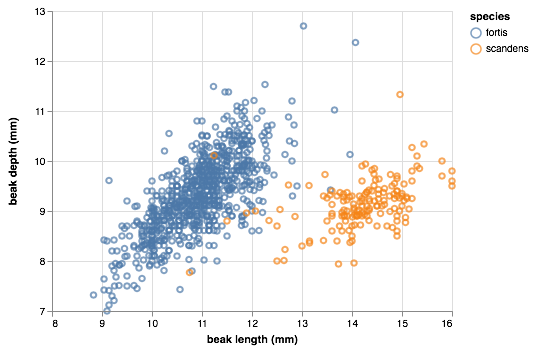

In [23]:
alt.Chart(df.loc[df['year']==1987, :]
    ).mark_point(
    ).encode(
        x=alt.X('beak length (mm):Q', scale=alt.Scale(zero=False)),
        y=alt.Y('beak depth (mm):Q', scale=alt.Scale(zero=False)),
        color=alt.Color('species:N',)
    )

**e)** To generate all of the plots, we can use the `row` encoding.

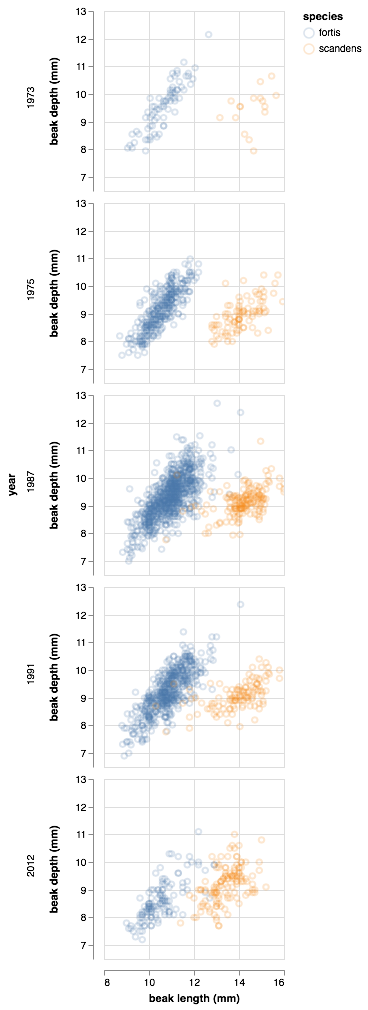

In [24]:
alt.Chart(df,
        height=180,
        width=180
    ).mark_point(
        opacity=0.2
    ).encode(
        x=alt.X('beak length (mm):Q', scale=alt.Scale(zero=False)),
        y=alt.Y('beak depth (mm):Q', scale=alt.Scale(zero=False)),
        color='species',
        row='year'
    ).interactive()

When we look at the data this way, we see the the species coming together.

<br />

## 3.3 The Anderson-Fisher iris data set

The Anderson-Fisher data set is a famous data set collected by Edgar Anderson and promoted by Ronald Fisher for use in [his technique of linear discriminant analysis in taxonometric problems](https://doi.org/10.1111%2Fj.1469-1809.1936.tb02137.x). The data set is now a classic data set that is used in data analysis. In this problem, you will explore this data set and ways of looking at it with Pandas/Altair.  The data set is available in `~/data/fisher_iris.csv`.

**a)** Generate a [dash-dot plot](https://altair-viz.github.io/gallery/dot_dash_plot.html#dot-dash-plot) of the petal width versus petal length. Why might this be a good way of visualizing this kind of data set?

**b)** Generate a [matrix plot](https://altair-viz.github.io/gallery/scatter_matrix.html#scatter-matrix) of this data set. What are the advantages of this kind of plot?

**c)** Explore for yourself! Come up with useful ways of plotting this multidimensional data set to help you explore it.

### 3.3 solution

Before proceeding, let's load in the data set.

In [25]:
df = pd.read_csv('data/fisher_iris.csv')

**a)** We can more or less follow the example from the Altair docs to make the dash-dot plot.

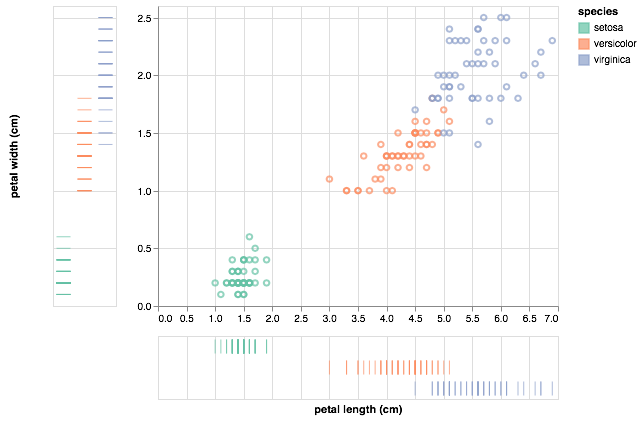

In [26]:
brush = alt.selection(type='interval')

tick_axis = alt.Axis(labels=False, domain=False, ticks=False)
tick_axis_notitle = alt.Axis(labels=False, domain=False, ticks=False, title='')

points = alt.Chart(df
    ).mark_point(
    ).encode(
        x=alt.X('petal length (cm)', axis=alt.Axis(title='')),
        y=alt.Y('petal width (cm)', axis=alt.Axis(title='')),
        color=alt.condition(brush,
                            alt.Color('species:N',
                                      scale=alt.Scale(range=['#66c2a5', '#fc8d62', '#8da0cb'])),
                            alt.value('gray'))
    ).add_selection(
        brush
    )

x_ticks = alt.Chart(df
    ).mark_tick(
    ).encode(
        alt.X('petal length (cm)', axis=tick_axis),
        alt.Y('species', axis=tick_axis_notitle),
        color=alt.condition(brush, 'species:N', alt.value('lightgray'))
    ).add_selection(
        brush
    )

y_ticks = alt.Chart(df
    ).mark_tick(
    ).encode(
        alt.X('species', axis=tick_axis_notitle),
        alt.Y('petal width (cm)', axis=tick_axis),
        color=alt.condition(brush, 'species:N', alt.value('lightgray'))
    ).add_selection(
        brush
    )

y_ticks | (points & x_ticks)

This is a useful way of visualizing data because it not only shows the correlation between two variables, but also shows how they vary individually.

**b)** We can again more or less follow the Altair docs.

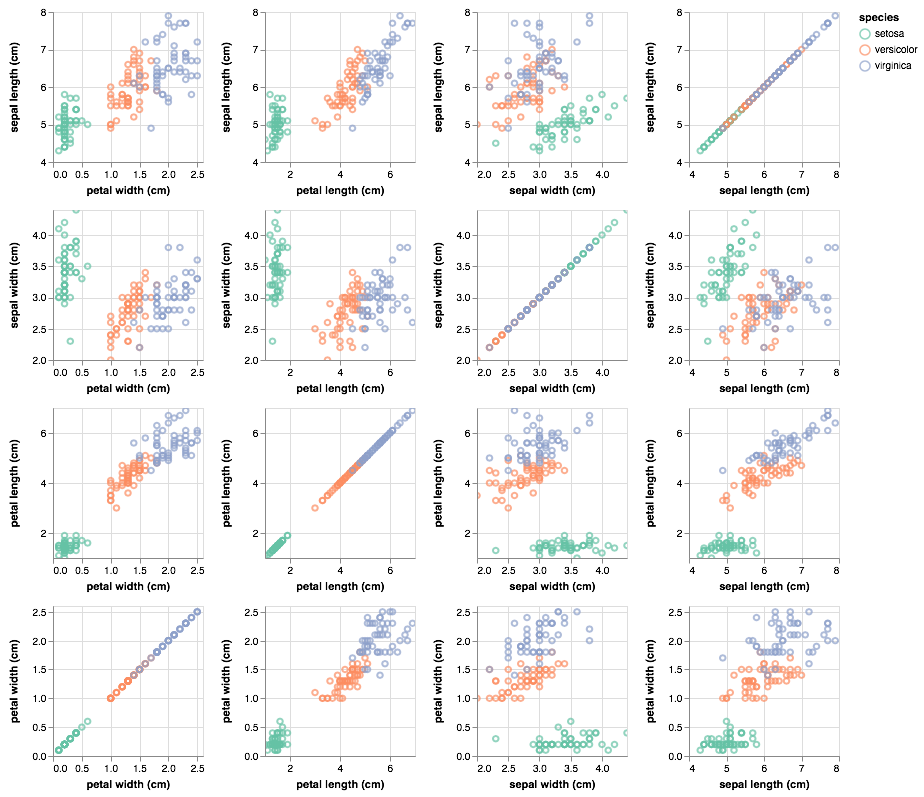

In [27]:
alt.Chart(df
    ).mark_point(
    ).encode(
        alt.X(alt.repeat('column'), type='quantitative', scale=alt.Scale(zero=False)),
        alt.Y(alt.repeat('row'), type='quantitative', scale=alt.Scale(zero=False)),
        color=alt.Color('species:N', 
                        scale=alt.Scale(range=['#66c2a5', '#fc8d62', '#8da0cb']))
    ).properties(
        width=150,
        height=150
    ).repeat(
        row=list(df.columns[df.columns.str.contains('cm')]),
        column=list(df.columns[df.columns.str.contains('cm')])[::-1]
    ).interactive()

A matrix plot allows you to look at how all pairs of variables are related. The diagonal is also like a strip plot, so you can see how the variable vary individually as well.